Use Autoencoder to implement anomaly detection. Build the model by using:
		a. Import required libraries
		b. Upload / access the dataset
		c. Encoder converts it into latent representation
		d. Decoder networks convert it back to the original input
		e. Compile the models with Optimizer, Loss, and Evaluation Metrics

## Use Autoencoder to implement anomaly detection

### a. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

The provided code block imports the required libraries for implementing the anomaly detection using an Autoencoder model. Let me break down the imports and their purposes:

```python
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
```

- `pandas` is a powerful data manipulation library in Python used for data analysis and manipulation. It provides data structures like DataFrame for handling structured data.
- `numpy` is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- `tensorflow` is an open-source machine learning library developed by the Google Brain team. It is widely used for building various machine learning and deep learning models.
- `seaborn` is a data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- `matplotlib.pyplot` is a collection of functions that make Matplotlib work like MATLAB. It is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
```

- `train_test_split` from `sklearn.model_selection` is used to split the dataset into training and testing sets. This is essential for evaluating the model's performance.
- `StandardScaler` from `sklearn.preprocessing` is used for standardizing features by removing the mean and scaling to unit variance. It is often used in preprocessing pipelines for machine learning models.
- `confusion_matrix`, `recall_score`, `accuracy_score`, and `precision_score` from `sklearn.metrics` are evaluation metrics commonly used in classification problems. `confusion_matrix` helps in calculating the confusion matrix, and `recall_score`, `accuracy_score`, and `precision_score` calculate recall, accuracy, and precision, respectively, for evaluating the model's performance.

With these imports, you can manipulate data, visualize it, split it into training and testing sets, preprocess features, and evaluate the performance of your machine learning models.

In [2]:
RANDOM_SEED = 2021 
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In the provided code block, three variables are defined:

1. **`RANDOM_SEED`**: This variable is set to `2021`. It is often used as a random seed in machine learning tasks to ensure reproducibility. Setting a random seed ensures that the random operations in the code produce the same results every time the code is run. This is particularly useful during the development and testing phases of a machine learning project.

2. **`TEST_PCT`**: This variable is set to `0.3`. It represents the proportion of the dataset that will be used for testing. In this case, 30% of the dataset will be used for testing the machine learning model, and the remaining 70% will be used for training.

3. **`LABELS`**: This variable is a list containing two strings: `"Normal"` and `"Fraud"`. It represents the class labels in a binary classification problem. In the context of anomaly detection, typically "Normal" refers to the majority class (non-anomalous or regular instances), and "Fraud" refers to the minority class (anomalous instances or fraud cases). These labels are used to interpret the output of the classification model.

These variables are often used to enhance the readability and maintainability of the code. By defining them as variables, it becomes easier to modify their values later in the code if needed, and the code is more self-explanatory when referencing these values.

## b. Upload / access the dataset

In [3]:
dataset = pd.read_csv("creditcard.csv")
print(list(dataset.columns))
dataset.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


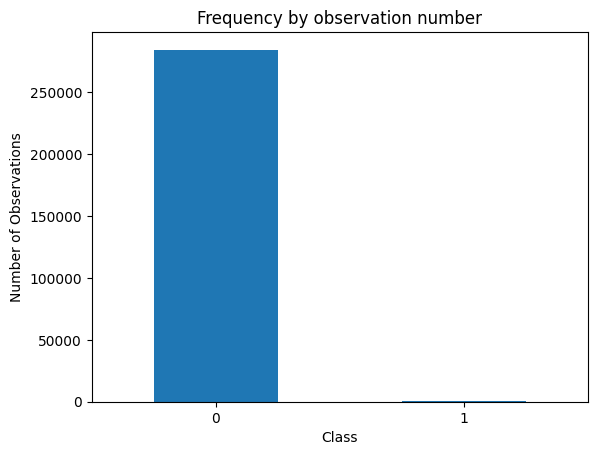

In [4]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(dataset['Class'], sort = True)
# print(count_classes)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dataset['Class'].unique())))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");
plt.show()

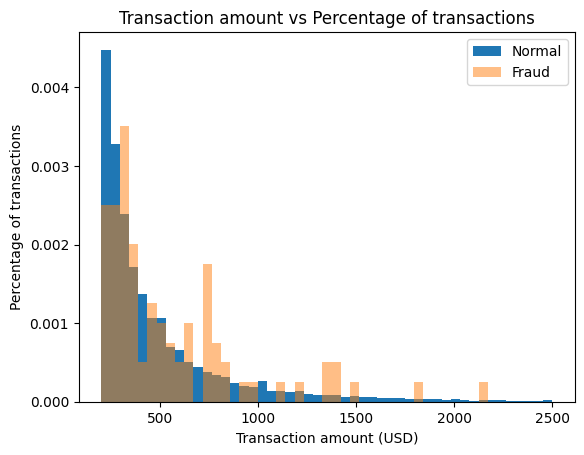

In [5]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = dataset[dataset.Class == 0] 
fraud_dataset = dataset[dataset.Class == 1]
#Visualize transaction amounts for normal and fraudulent transactions
bins = np.linspace(200, 2500) # Return evenly spaced numbers over a specified interval.
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

In [6]:
sc=StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In the provided code block, the `StandardScaler` from scikit-learn is used to scale the 'Time' and 'Amount' columns in the `dataset`. Scaling is a common preprocessing step in machine learning, where the features are transformed to have a mean of 0 and a standard deviation of 1. This ensures that all features have the same scale, preventing some features from dominating others during the training process.

Here's what each line of the code does:

1. **`sc=StandardScaler()`**: This line creates an instance of the `StandardScaler` class, which will be used to scale the 'Time' and 'Amount' columns.

2. **`dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))`**: This line scales the 'Time' column. `sc.fit_transform` computes the mean and standard deviation from the 'Time' column and scales its values accordingly. The `.reshape(-1, 1)` is used to convert the 1-dimensional array of 'Time' values into a 2-dimensional array with a single column, which is the format expected by the `fit_transform` method.

3. **`dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))`**: Similarly, this line scales the 'Amount' column using the same process as the 'Time' column.

After these operations, the 'Time' and 'Amount' columns in the `dataset` are scaled and ready to be used as inputs for the machine learning model.

In [7]:
dataset['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [8]:
train_x, test_x = train_test_split(dataset, test_size=TEST_PCT, random_state=RANDOM_SEED)
train_x = train_x[train_x.Class == 0]       # where normal transactions
train_x = train_x.drop(['Class'], axis=1)   # drop the class column


test_y = test_x['Class']                    # save the class column for the test set
test_x = test_x.drop(['Class'], axis=1)     # drop the class column

train_x = train_x.values                    # transform to ndarray
test_x = test_x.values                      # transform to ndarray

In this code block, the dataset is split into training and testing sets, and additional preprocessing steps are applied. Let me break down what each line does:

1. **`train_x, test_x = train_test_split(dataset, test_size=TEST_PCT, random_state=RANDOM_SEED)`**:
   - `train_test_split` function from scikit-learn is used to split the `dataset` into training and testing sets.
   - `test_size=TEST_PCT` specifies that 30% of the data will be used for testing.
   - `random_state=RANDOM_SEED` ensures reproducibility by fixing the random seed for the split.

2. **`train_x = train_x[train_x.Class == 0]`**:
   - This line filters the training data (`train_x`) to keep only the rows where the 'Class' column is 0, indicating normal transactions. This step focuses the training data on normal instances for anomaly detection.

3. **`train_x = train_x.drop(['Class'], axis=1)`**:
   - The 'Class' column is dropped from the training data as it is not needed for training the model. This step removes the target variable from the input features.

4. **`test_y = test_x['Class']`**:
   - The 'Class' column from the testing data (`test_x`) is saved as `test_y`. This will be used later for evaluating the model's performance.

5. **`test_x = test_x.drop(['Class'], axis=1)`**:
   - Similar to the training data, the 'Class' column is dropped from the testing data to prepare the input features for testing the model.

6. **`train_x = train_x.values`** and **`test_x = test_x.values`**:
   - Both the training and testing data are converted to NumPy arrays (`ndarray`) for compatibility with machine learning models. This transformation is necessary as most machine learning libraries, including TensorFlow, expect input data in array format for model training and evaluation.

After these steps, `train_x` contains the input features for the training data (excluding the 'Class' column), `test_x` contains the input features for the testing data, and `test_y` contains the corresponding true labels for the testing data. These datasets are now ready to be used to train and evaluate the anomaly detection model.

#### Autoencoder Layer Structure and Parameters
Autoencoder has symmetric encoding and decoding layers that are "dense". We are reducing the input into some form of simplified encoding and then expanding it again. The input and output dimension is the feature space (e.g. 30 columns), so the encoding layer should be smaller by an amount that expect to represent some feature. In this case, I am encoding 30 columns into 14 dimensions so I am expecting high-level features to be represented by roughly two columns (30/14 = 2.1). Of those high-level features, I am expecting them to map to roughly seven hidden/latent features in the data.

Additionally, the epochs, batch size, learning rate, learning policy, and activation functions were all set to values empirically good values.

Autoencoders explained - https://youtu.be/3jmcHZq3A5s?si=nchO8uj_BK0qn4ux
Credit Card Anomaly Detection Video - https://youtu.be/Qk2ix6YpvU4?si=XNtSrSKtPa_zHp5f

In [9]:
nb_epoch = 50
batch_size = 64
input_dim = train_x.shape[1] # num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4  
learning_rate = 1e-7

## c. Encoder converts it into latent representation

In [10]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",                                
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

## d. Decoder networks convert it back to the original input

In [11]:
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In this code snippet, you've defined an autoencoder model with dropout layers added to the encoder and decoder parts. Dropout layers are a regularization technique commonly used to prevent overfitting in neural networks. Here's the breakdown of the code:

1. **Input Layer:**
   ```python
   input_layer = tf.keras.layers.Input(shape=(input_dim, ))
   ```
   - Defines the input layer with a shape corresponding to the number of features (`input_dim`).

2. **Encoder:**
   ```python
   encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",                                
                        activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
   encoder = tf.keras.layers.Dropout(0.2)(encoder)
   encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
   encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
   ```
   - The input data passes through a dense layer with a tanh activation function and dropout rate of 20%. Dropout randomly sets a fraction of input units to 0 during training, which helps prevent overfitting.
   - Two more dense layers are added to further reduce the dimensionality of the input data.

3. **Decoder:**
   ```python
   decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
   decoder = tf.keras.layers.Dropout(0.2)(decoder)
   decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
   decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
   ```
   - The decoder part also includes dropout layers with a 20% dropout rate. These dropout layers help prevent overfitting during the reconstruction of the input data.
   - Two dense layers are used to reconstruct the input data back to its original dimensionality.

4. **Autoencoder:**
   ```python
   autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
   ```
   - Defines the complete autoencoder model, specifying the input and output layers.

5. **Summary:**
   ```python
   autoencoder.summary()
   ```
   - Prints a summary of the autoencoder model, showing the architecture and the number of parameters in each layer.

With the addition of dropout layers, the model is expected to be more robust and generalizable, especially when dealing with limited training data. Experimenting with different dropout rates can help find the optimal balance between preventing overfitting and retaining useful information for reconstruction.

## e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [12]:
"""Define the callbacks for checkpoints and early stopping"""

cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In the provided code snippet, callbacks are defined for model checkpointing and early stopping during training. Here's what each callback does:

1. **ModelCheckpoint Callback:**
   ```python
   cp = tf.keras.callbacks.ModelCheckpoint(
       filepath="autoencoder_fraud.h5",
       mode='min',
       monitor='val_loss',
       verbose=2,
       save_best_only=True
   )
   ```
   - `ModelCheckpoint` is a callback in Keras that saves the model's weights during training.
   - `filepath` specifies the file path where the model weights will be saved.
   - `mode` is set to `'min'` to monitor the validation loss. The callback will save the model weights when the validation loss reaches its minimum.
   - `monitor` specifies the metric to monitor during training, in this case, it's `'val_loss'`.
   - `verbose` controls the verbosity of the output during training. Setting it to `2` prints a message for each epoch.
   - `save_best_only=True` ensures that only the best models (in terms of the monitored metric) are saved.

2. **EarlyStopping Callback:**
   ```python
   early_stop = tf.keras.callbacks.EarlyStopping(
       monitor='val_loss',
       min_delta=0.0001,
       patience=10,
       verbose=1,
       mode='min',
       restore_best_weights=True
   )
   ```
   - `EarlyStopping` is a callback that stops training the model when a monitored metric has stopped improving.
   - `monitor` specifies the metric to monitor during training, in this case, it's `'val_loss'`.
   - `min_delta` is the minimum change in the monitored metric to qualify as an improvement. A change less than this value will count as no improvement.
   - `patience` is the number of epochs with no improvement after which training will be stopped.
   - `verbose` controls the verbosity of the output. Setting it to `1` prints a message when training is stopped due to early stopping.
   - `mode` is set to `'min'` to monitor the validation loss. Training will stop when the quantity monitored has stopped decreasing.
   - `restore_best_weights=True` restores the model's weights from the epoch with the best value of the monitored quantity.

These callbacks are useful for saving the best model obtained during training and preventing overfitting by stopping training when the validation loss stops decreasing. They are typically passed as arguments to the `fit` method when training the Keras model.

In [13]:
#Compile the Autoencoder

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In the provided code snippet, the autoencoder model is compiled using the Adam optimizer, mean squared error loss, and accuracy as a metric for evaluation. Let's break down this compilation step:

```python
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')
```

- **`metrics=['accuracy']`**: This specifies that the accuracy metric should be calculated during training and evaluation. However, in the context of an autoencoder, accuracy might not be the most meaningful metric because the model is not explicitly performing a classification task. Instead, mean squared error or other reconstruction loss metrics are often more relevant for autoencoders.

- **`loss='mean_squared_error'`**: This sets the loss function to mean squared error (MSE). MSE measures the average squared difference between the predicted and actual values. In the context of autoencoders, MSE is a common choice as it quantifies how well the model is able to reconstruct the input data.

- **`optimizer='adam'`**: This sets the optimizer to Adam, which is a popular optimization algorithm that adapts the learning rates of each parameter during training. Adam is well-suited for a wide range of machine learning tasks and is often a good choice for autoencoder models.

It's worth noting that the choice of loss function and optimizer can depend on the specific problem and dataset. MSE is a good starting point for autoencoders, but you might want to experiment with other loss functions (such as binary cross-entropy for binary input data) and optimizers to find the best configuration for your use case.

In [14]:
#Train the Autoencoder

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history


Epoch 1/50
3083/3110 [============================>.] - ETA: 0s - loss: 0.8746 - accuracy: 0.3445
Epoch 1: val_loss improved from inf to 0.82135, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 9s 2ms/step - loss: 0.8753 - accuracy: 0.3447 - val_loss: 0.8213 - val_accuracy: 0.3847
Epoch 2/50
3110/3110 [==============================] - ETA: 0s - loss: 0.8199 - accuracy: 0.3566
Epoch 2: val_loss improved from 0.82135 to 0.79823, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 8s 2ms/step - loss: 0.8199 - accuracy: 0.3566 - val_loss: 0.7982 - val_accuracy: 0.3919
Epoch 3/50
3087/3110 [============================>.] - ETA: 0s - loss: 0.8083 - accuracy: 0.3672
Epoch 3: val_loss improved from 0.79823 to 0.78788, saving model to autoencoder_fraud.h5
3110/3110 [==============================] - 7s 2ms/step - loss: 0.8071 - accuracy: 0.3672 - val_loss: 0.7879 - val_accuracy: 0.3933
Epoch 4/50
3091/3110 [======================

KeyboardInterrupt: 


- **`train_x, train_x`**: The autoencoder is trained using the same input data for both input and target (reconstruction) since it's an unsupervised learning task aiming to reconstruct the input data.

- **`epochs=nb_epoch`**: Specifies the number of epochs for which the model will be trained.

- **`batch_size=batch_size`**: Defines the number of samples that will be used in each iteration of training. The model's weights are updated after processing each batch of data.

- **`shuffle=True`**: Shuffles the training data before each epoch, ensuring that the model doesn't learn the order of the data.

- **`validation_data=(test_x, test_x)`**: Specifies the validation data that will be used to monitor the model's performance during training. The model's performance on this data is evaluated after each epoch.

- **`verbose=1`**: Prints training progress information for each epoch.

- **`callbacks=[cp, early_stop]`**: Applies the defined callbacks during training. `ModelCheckpoint` saves the model's weights, and `EarlyStopping` stops training early if the validation loss does not improve for a certain number of epochs.

- **`.history`**: Stores the training history, including loss and accuracy metrics, for later analysis or visualization.

After training, you can use the `history` object to plot training and validation loss curves or analyze other metrics to evaluate the model's performance during training.

In [15]:
#Plot training and test loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

NameError: name 'history' is not defined

In [16]:
"""Detect Anomalies on test data

Anomalies are data points where the reconstruction loss is higher

To calculate the reconstruction loss on test data, 
predict the test data and calculate the mean square error between the test data and the reconstructed test data."""

test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df

2671/2671 [==============================] - 3s 1ms/step


,Reconstruction_error,True_class
189186,0.785643,0
246366,0.339846,0
135276,0.179696,0
283036,0.273523,0
12229,42.142521,0
...,...,...
34145,0.531454,0
176198,0.170341,0
70683,0.336530,0
147573,0.246034,0


In this code snippet, anomalies (or outliers) in the test data are detected by calculating the reconstruction loss, which represents the dissimilarity between the input data and its reconstruction generated by the autoencoder model. Here's how it works:

```python
# Predict the test data using the trained autoencoder model
test_x_predictions = autoencoder.predict(test_x)

# Calculate the mean squared error (reconstruction loss) between the test data and reconstructed test data
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)

# Create a DataFrame to store reconstruction errors and true class labels
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})

# Display summary statistics of the reconstruction errors
error_df.describe()
```

1. **`autoencoder.predict(test_x)`:** This line uses the trained autoencoder model to predict the test data (`test_x`), generating the reconstructed test data.

2. **`np.mean(np.power(test_x - test_x_predictions, 2), axis=1)`:** This line calculates the mean squared error (MSE) between the test data and its reconstruction. For each data point, the squared differences between the original and reconstructed values are averaged. The `axis=1` argument ensures the mean is calculated along the columns, producing a 1D array of MSE values.

3. **`error_df = pd.DataFrame(...)`:** The calculated reconstruction errors and true class labels (`test_y`) are stored in a pandas DataFrame. The 'Reconstruction_error' column contains the MSE values, and the 'True_class' column contains the true labels (normal or fraud) corresponding to the test data.

4. **`error_df.describe()`:** This line prints summary statistics of the reconstruction errors, providing insights into the distribution of errors and potential anomalies. You can analyze these statistics to set a threshold for classifying data points as anomalies. Data points with reconstruction errors significantly higher than the mean might be considered anomalies or outliers.

In [ ]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize 
#if the threshold value needs to be adjusted.

# threshold_fixed = 4
# groups = error_df.groupby('True_class')
# fig, ax = plt.subplots()
# for name, group in groups:
#     ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
#             label= "Fraud" if name == 1 else "Normal")
# ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
# ax.legend()
# plt.title("Reconstruction error for normal and fraud data")
# plt.ylabel("Reconstruction error")
# plt.xlabel("Data point index")
# plt.show();

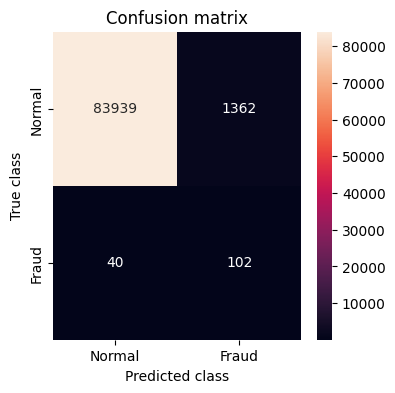

 Accuracy:  0.9835914001146964
 Recall:  0.7183098591549296
 Precision:  0.06967213114754098


In [17]:
'''Detect anomalies as points where the reconstruction loss is greater than a fixed threshold. 
Here we see that a value of 52 for the threshold will be good.

Evaluating the performance of the anomaly detection'''

threshold_fixed = 4.5
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

In this code snippet, anomalies are detected by comparing the calculated reconstruction errors with a fixed threshold value (52 in this case). Data points with reconstruction errors greater than the threshold are classified as anomalies (1), while those with errors below the threshold are classified as normal (0). The confusion matrix is then calculated to evaluate the performance of the anomaly detection.

```python
threshold_fixed = 52

# Classify data points as anomalies (1) or normal (0) based on the fixed threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]

# Add the predicted labels to the DataFrame
error_df['pred'] = pred_y

# Calculate the confusion matrix to evaluate the performance
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
```

In this code snippet:

- **`pred_y`**: A list comprehension is used to generate a list of binary predictions. For each reconstruction error value in `error_df.Reconstruction_error.values`, if the error is greater than the fixed threshold (`threshold_fixed`), it's classified as 1 (anomaly). Otherwise, it's classified as 0 (normal).

- **`error_df['pred'] = pred_y`**: The predicted labels are added as a new column 'pred' in the `error_df` DataFrame.

- **`conf_matrix = confusion_matrix(error_df.True_class, pred_y)`**: The confusion matrix is calculated using the true class labels (`True_class` column in `error_df`) and the predicted labels (`pred_y`). The confusion matrix provides information about the performance of the anomaly detection model, showing the number of true positives, true negatives, false positives, and false negatives.

You can further analyze the confusion matrix to calculate metrics such as accuracy, precision, recall, and F1-score to assess the performance of the anomaly detection model more comprehensively.